Assignment 8.1.: Sentiment analysis

Sentiment analysis: Machine learning based method

In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from transformers import pipeline
import re

df = pd.read_csv('tweets-data.csv')

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    tokens = text.split()
    cleaned = ' '.join(tokens)
    return cleaned

df_sample = df.sample(n=500, random_state=42)
df_sample['cleaned_tweet'] = df_sample['Tweets'].apply(clean_tweet)

sentiment_pipeline = pipeline('sentiment-analysis', truncation=True)

texts = df_sample['cleaned_tweet'].tolist()
results = sentiment_pipeline(texts)

df_sample['sentiment_label'] = [r['label'].lower() for r in results]
df_sample['sentiment_score'] = [r['score'] for r in results]

print(df_sample[['Tweets', 'cleaned_tweet', 'sentiment_label', 'sentiment_score']].head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                                 Tweets  \
2899  Le #DessinDePresse de Sanaga : ls sont morts c...   
594   #Russia #Wagner #RussiaCivilWar https://t.co/P...   
2870  Exclusive content -https://t.co/oEiSIIB2Z1\n.\...   
52    Auch heute geht die politische Nachricht des T...   
1391  @crazyclipsonly Same type that would take a ho...   

                                          cleaned_tweet sentiment_label  \
2899  Le DessinDePresse de Sanaga ls sont morts comm...        negative   
594                        Russia Wagner RussiaCivilWar        negative   
2870  Exclusive content cosplay japan Titan titanics...        negative   
52    Auch heute geht die politische Nachricht des T...        negative   
1391  Same type that would take a homemade PlayStati...        negative   

      sentiment_score  
2899         0.981537  
594          0.962062  
2870         0.961531  
52           0.975570  
1391         0.994473  


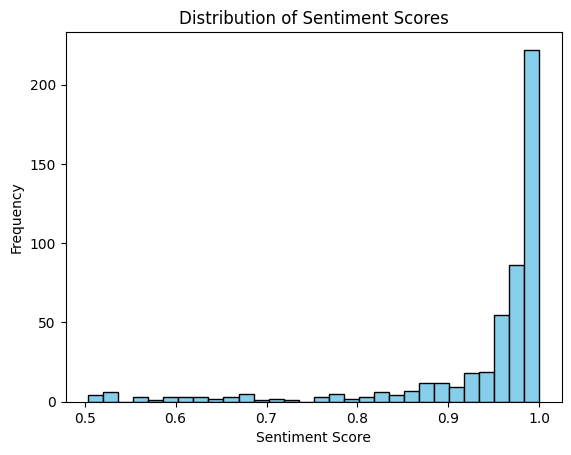

Examples with high scores (>0.95):
                                                 Tweets sentiment_label  \
2899  Le #DessinDePresse de Sanaga : ls sont morts c...        negative   
594   #Russia #Wagner #RussiaCivilWar https://t.co/P...        negative   
2870  Exclusive content -https://t.co/oEiSIIB2Z1\n.\...        negative   
52    Auch heute geht die politische Nachricht des T...        negative   
1391  @crazyclipsonly Same type that would take a ho...        negative   

      sentiment_score  
2899         0.981537  
594          0.962062  
2870         0.961531  
52           0.975570  
1391         0.994473  

Examples with low scores (<0.60):
                                                 Tweets sentiment_label  \
1116  Totalmente cierto #submarino #Titanic #Titan #...        positive   
2600  En #Cuba encuentra la casa de tus vacaciones s...        positive   
332   @McFaul @SecBlinken There is more wickedness t...        positive   
2232  Listening to "The Titanic and

In [6]:
#plotting
import matplotlib.pyplot as plt

plt.hist(df_sample['sentiment_score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

#high sentiment scores
print("Examples with high scores (>0.95):")
print(df_sample[df_sample['sentiment_score'] > 0.95][['Tweets', 'sentiment_label', 'sentiment_score']].head(5))

#low sentiment scores
print("\nExamples with low scores (<0.60):")
print(df_sample[df_sample['sentiment_score'] < 0.60][['Tweets', 'sentiment_label', 'sentiment_score']].head(5))